In [73]:
import sys
sys.path.insert(0, '../python/lib/')
import ons
import utl
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 8)
api_key = <your api key here>

Get all economic datasets available

In [2]:
%%capture
datasets= ons.get_datasets_for_context('Economic',api_key)
datasets.head()

,name,geography,differentiator,file_url,publication_date
0,Enterprise/local units by Industry and Norther...,2011 Statistical Geography Hierarchy,,http://data.statistics.gov.uk/ons/datasets/csv...,2015-12-04Z
1,Enterprise/local units by Industry and Parliam...,2011 Statistical Geography Hierarchy,,http://data.statistics.gov.uk/ons/datasets/csv...,2015-12-04Z
2,"Enterprise/local units by Industry, Employment...",2011 Statistical Geography Hierarchy,,http://data.statistics.gov.uk/ons/datasets/csv...,2015-12-04Z
3,Enterprise by Turnover size band and Northern ...,2011 Statistical Geography Hierarchy,,http://data.statistics.gov.uk/ons/datasets/csv...,2015-12-04Z
4,Enterprise by Turnover size band and Parliamen...,2011 Statistical Geography Hierarchy,,http://data.statistics.gov.uk/ons/datasets/csv...,2015-12-04Z


We'll look at the monthly retail sales data

In [23]:
data = utl.get_csv_data_from_url(datasets[(datasets['name']=='Retail Sales') 
                                          & (datasets['differentiator'] == 'Months')]['file_url'].values[0])

Get alcohol and tobacco sales at the current price, seasonally and non-seasonally adjusted

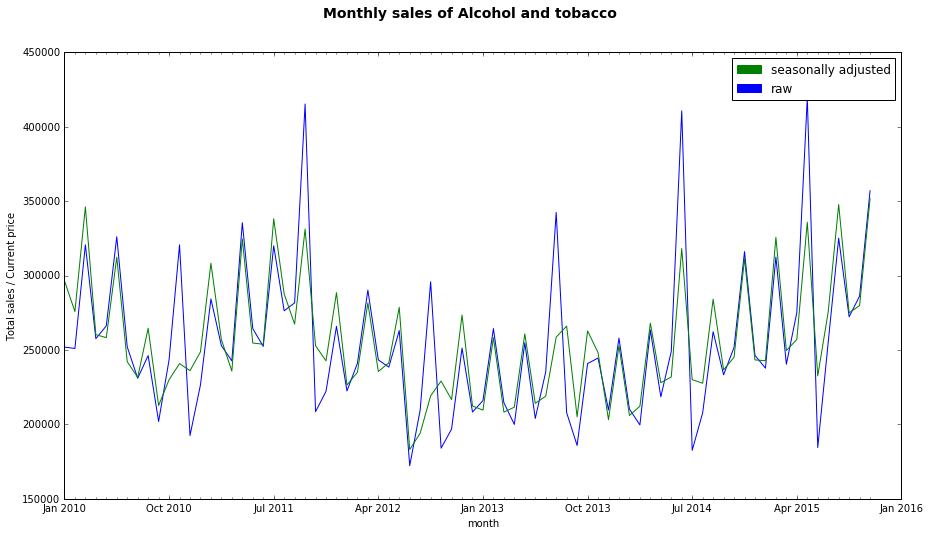

In [74]:
df = pandas.concat([data[x] for x in [
        ('Geographic Area'),
        ('Time'),
        ('Total: Not Seasonally Adjusted','Total: Current Price','Total: AGG27 - Alcohol and tobacco','Total: Total Sales Cash','Total: All Businesses'),
        ('Total: Seasonally Adjusted','Total: Current Price','Total: AGG27 - Alcohol and tobacco','Total: Total Sales Cash','Total: All Businesses')
 
        ]], axis = 1)
df[('Total: Not Seasonally Adjusted','Total: Current Price','Total: AGG27 - Alcohol and tobacco','Total: Total Sales Cash','Total: All Businesses')] = df[('Total: Not Seasonally Adjusted','Total: Current Price','Total: AGG27 - Alcohol and tobacco','Total: Total Sales Cash','Total: All Businesses')].map(lambda x: int(x))
df[('Total: Seasonally Adjusted','Total: Current Price','Total: AGG27 - Alcohol and tobacco','Total: Total Sales Cash','Total: All Businesses')] = df[('Total: Seasonally Adjusted','Total: Current Price','Total: AGG27 - Alcohol and tobacco','Total: Total Sales Cash','Total: All Businesses')].map(lambda x: int(x))


fig = plt.figure()
fig.suptitle('Monthly sales of Alcohol and tobacco', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('month')
ax.set_ylabel('Total sales / Current price')
# Set y tick locations
from matplotlib.ticker import FixedLocator

fl = FixedLocator(range(len(df)))
ax.xaxis.set_minor_locator(fl)
plt.plot(df.index,df[('Total: Not Seasonally Adjusted','Total: Current Price','Total: AGG27 - Alcohol and tobacco','Total: Total Sales Cash','Total: All Businesses')])
plt.plot(df.index,df[('Total: Seasonally Adjusted','Total: Current Price','Total: AGG27 - Alcohol and tobacco','Total: Total Sales Cash','Total: All Businesses')])
green_patch = mpatches.Patch(color='green', label='seasonally adjusted')
blue_patch = mpatches.Patch(color='blue', label='raw')
plt.legend(handles=[green_patch,blue_patch])
ax.xaxis.set_ticklabels(df['Time'][0::len(ax.xaxis.get_major_ticks())]);
